# Time Series Analysis - Employment by sector forcast

## 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from numpy import log
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Import the data

In [2]:
df = pd.read_csv(r'C:\Users\Sanjeshni\Desktop\doc\Capstone Project\Employment_by_Industry_1.csv')


## 3. Exploratory Data Analysis

In [3]:
# Checking the first five row of the data
df.head()

Period  Primary_Industry  Goods-producing industries  \
0  2019-05-01            309839                     1236421   
1  2019-06-01            305833                     1235296   
2  2019-07-01            306471                     1235365   
3  2019-08-01            305536                     1235864   
4  2019-09-01            306734                     1240464   

   Service industries  Agriculture, Forestry and Fishing  Mining  \
0             4950473                              96007  238502   
1             4945864                              92219  233050   
2             4948206                              92710  231264   
3             4955067                              93407  232961   
4             4978518                              94106  231828   

   Manufacturing  Electricity, Gas, Water and Waste Services  Construction  \
0         232878                                       19016        171566   
1         227383                                       19053        171815   
2         225474                                       19217        171966   
3         227200                                       19296        171748   
4         226052                                       19423        172541   

   Wholesale Trade  ...  Accommodation and Food Services  \
0           112355  ...                           146901   
1           111690  ...                           144688   
2           111124  ...                           144510   
3           110744  ...                           145570   
4           110190  ...                           147165   

   Transport, Postal and Warehousing  \
0                              93421   
1                              96036   
2                              95614   
3                              92442   
4                              95911   

   Information Media and Telecommunications  Financial and Insurance Services  \
0                                     32985                             62940   
1                                     31368                             62836   
2                                     31232                             63008   
3                                     32614                             63218   
4                                     31490                             63295   

   Rental, Hiring and Real Estate Services  \
0                                    34062   
1                                    33968   
2                                    34127   
3                                    33603   
4                                    33981   

   Professional, Scientific and Technical Services  \
0                                           169464   
1                                           169097   
2                                           168465   
3                                           168916   
4                                           166432   

   Administrative and Support Services  Public Administration and Safety  \
0                               111136                            133655   
1                               105300                            135172   
2                               100245                            136117   
3                               100255                            134942   
4                               100575                            137651   

   Arts and Recreation Services  Other Services  
0                         40709           71800  
1                         41343           72078  
2                         41667           72182  
3                         41709           72005  
4                         41736           72778  

[5 rows x 21 columns]

In [30]:
# Checking the data infomation and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Period                                           46 non-null     object
 1   Primary_Industry                                 46 non-null     int64 
 2   Goods-producing industries                       46 non-null     int64 
 3   Service industries                               46 non-null     int64 
 4   Agriculture, Forestry and Fishing                46 non-null     int64 
 5   Mining                                           46 non-null     int64 
 6   Manufacturing                                    46 non-null     int64 
 7   Electricity, Gas, Water and Waste Services       46 non-null     int64 
 8   Construction                                     46 non-null     int64 
 9   Wholesale Trade                              

In [31]:
# Checking the data shape
df.shape

(46, 21)

In [32]:
# checking to see if any null values
df.isnull().sum()

Period                                             0
Primary_Industry                                   0
Goods-producing industries                         0
Service industries                                 0
Agriculture, Forestry and Fishing                  0
Mining                                             0
Manufacturing                                      0
Electricity, Gas, Water and Waste Services         0
Construction                                       0
Wholesale Trade                                    0
Retail Trade                                       0
Accommodation and Food Services                    0
Transport, Postal and Warehousing                  0
Information Media and Telecommunications           0
Financial and Insurance Services                   0
Rental, Hiring and Real Estate Services            0
Professional, Scientific and Technical Services    0
Administrative and Support Services                0
Public Administration and Safety              

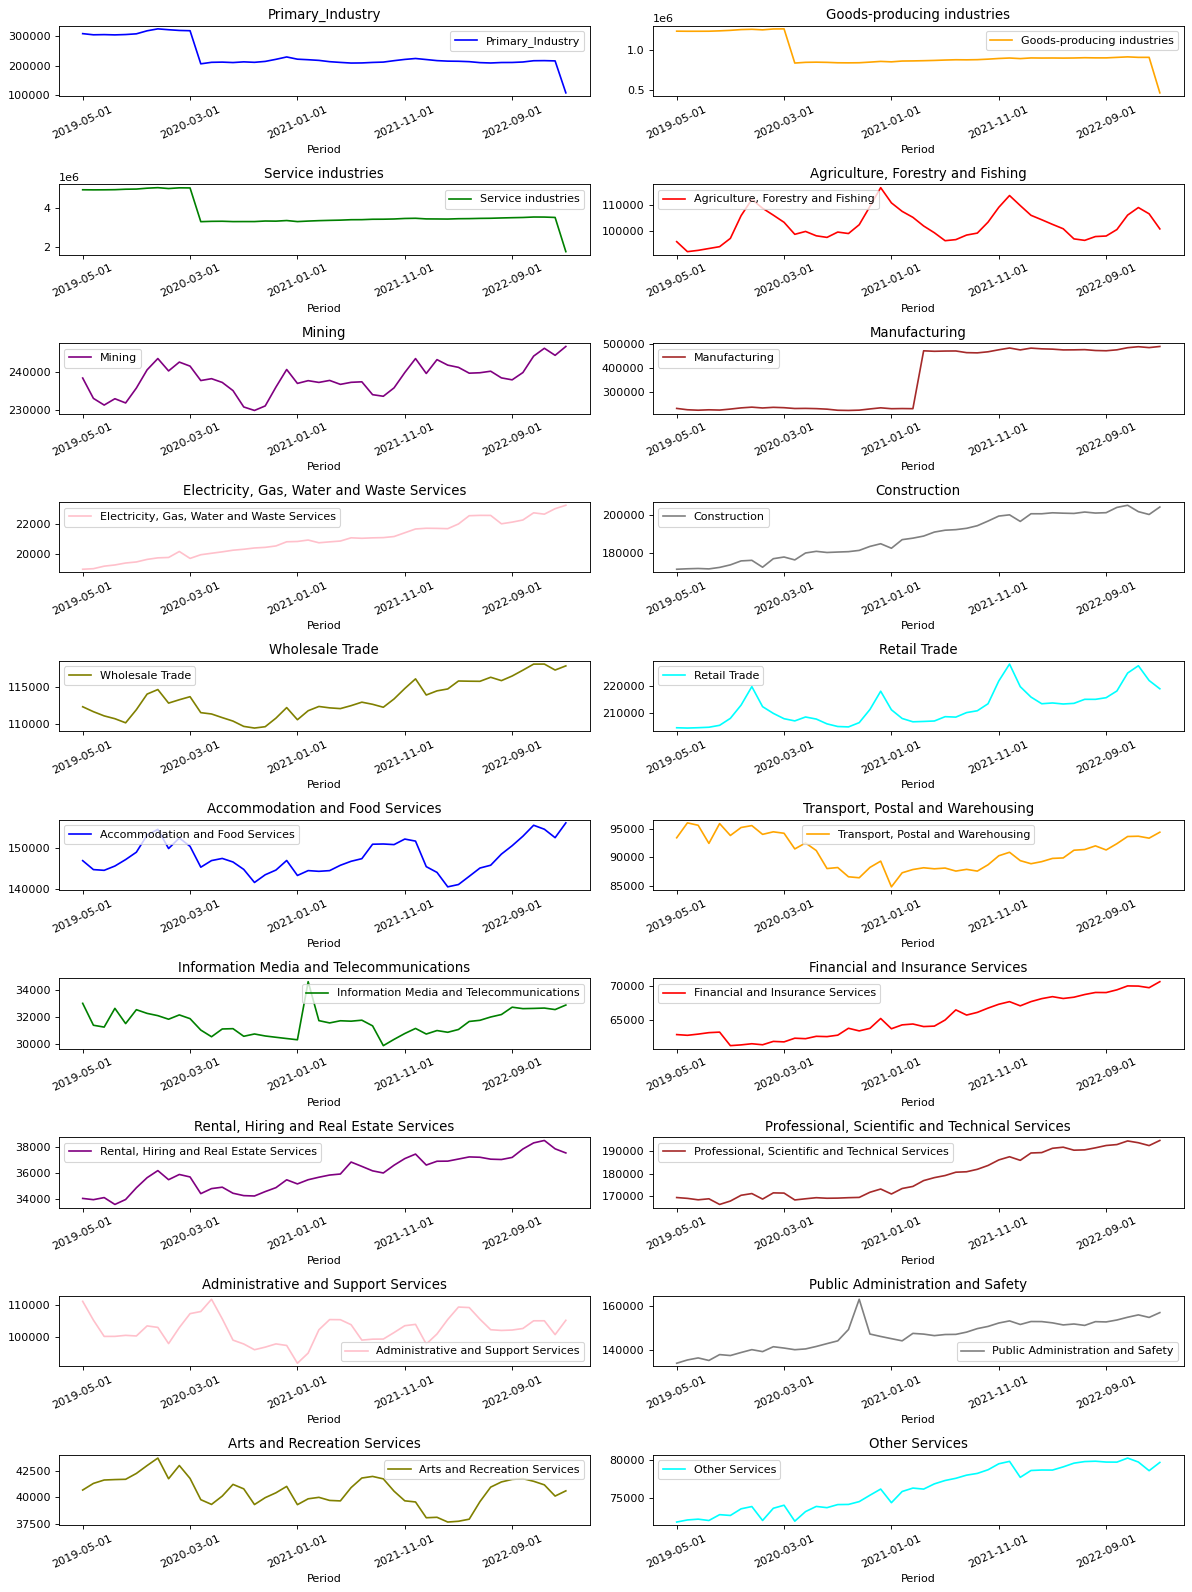

In [34]:
# Doing some data analysis 
# Plotting line gragh to see the performance of the data ie the employment trend with different industries


titles = [
         'Primary_Industry'
        ,'Goods-producing industries'
        ,'Service industries'
        ,'Agriculture, Forestry and Fishing'
        ,'Mining'
        ,'Manufacturing'
        ,'Electricity, Gas, Water and Waste Services'
        ,'Construction'
        ,'Wholesale Trade'
        ,'Retail Trade'
        ,'Accommodation and Food Services'
        ,'Transport, Postal and Warehousing'
        ,'Information Media and Telecommunications'
        ,'Financial and Insurance Services'
        ,'Rental, Hiring and Real Estate Services'
        ,'Professional, Scientific and Technical Services'
        ,'Administrative and Support Services'
        ,'Public Administration and Safety'
        ,'Arts and Recreation Services'
        ,'Other Services'
]

feature_keys = [
         'Primary_Industry'
        ,'Goods-producing industries'
        ,'Service industries'
        ,'Agriculture, Forestry and Fishing'
        ,'Mining'
        ,'Manufacturing'
        ,'Electricity, Gas, Water and Waste Services'
        ,'Construction'
        ,'Wholesale Trade'
        ,'Retail Trade'
        ,'Accommodation and Food Services'
        ,'Transport, Postal and Warehousing'
        ,'Information Media and Telecommunications'
        ,'Financial and Insurance Services'
        ,'Rental, Hiring and Real Estate Services'
        ,'Professional, Scientific and Technical Services'
        ,'Administrative and Support Services'
        ,'Public Administration and Safety'
        ,'Arts and Recreation Services'
        ,'Other Services'
]


colors = [
        "blue",
        "orange",
        "green",
        "red",
        "purple",
        "brown",
        "pink",
        "gray",
        "olive",
        "cyan",
]

date_time_key = "Period"


def show_raw_visualization(data):
    time_data = df[date_time_key]
    fig, axes = plt.subplots(
        nrows=10, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)
                        

## 3. Data Modeling

In [35]:
# We going to use ARIMA Module - Seems like both ARIMA and SARIMA has been merged
# Now let's check if our data is stationary - we going to use Adfuller to check the P Value 


result = adfuller(df.Mining.dropna())
def adfuller_test(Mining):
    result = adfuller(df['Mining'])
    labels = ['ADF Statistic: %f','p-value: %f', '#lags Used', 'Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), hence reject null hypothesis. Data is Staionary" )
    else:
        print("Weak evidence, indicating it is non-staionary")
                    
adfuller_test(df['Mining'])      

ADF Statistic: %f : -1.7815040802192887
p-value: %f : 0.3896822937055069
#lags Used : 0
Number of Observation Used : 45
Weak evidence, indicating it is non-staionary


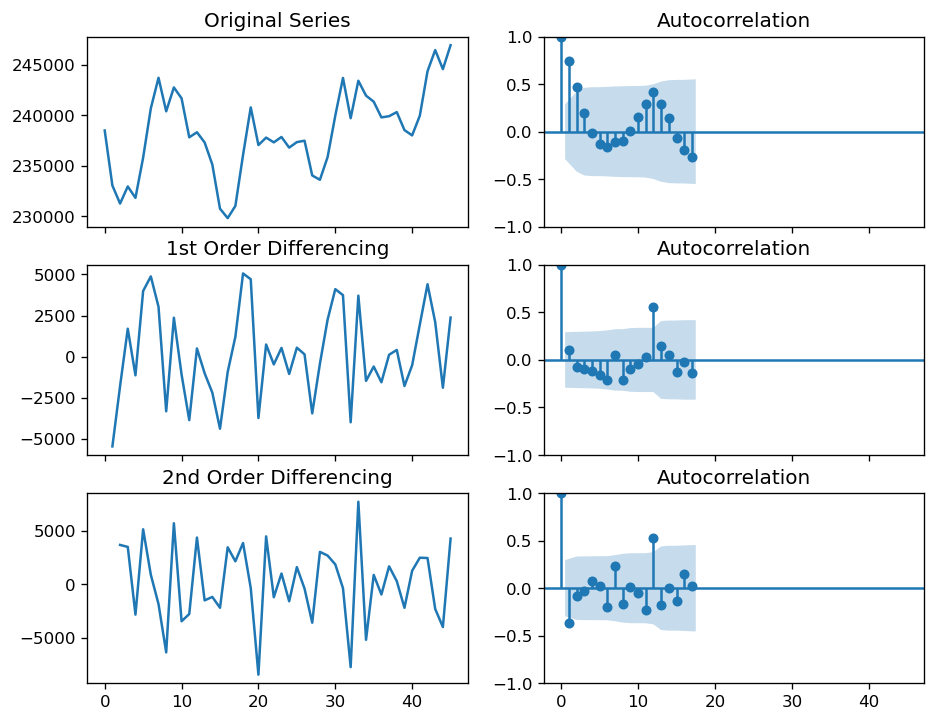

In [48]:
# Below i have plotted original, 1st and the 2nd difference 


plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Mining']); axes[0, 0].set_title('Original Series')
plot_acf(df['Mining'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Mining'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Mining'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Mining'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Mining'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

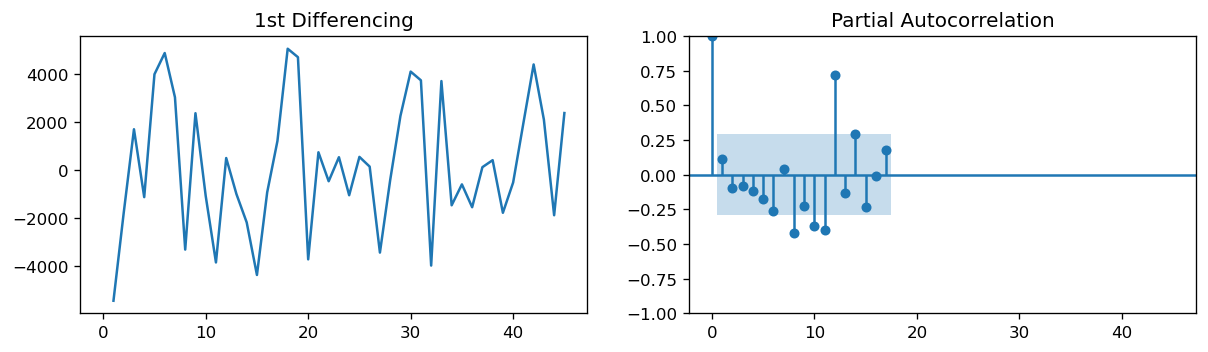

In [50]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Mining.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Mining.diff().dropna(), ax=axes[1])

plt.show()

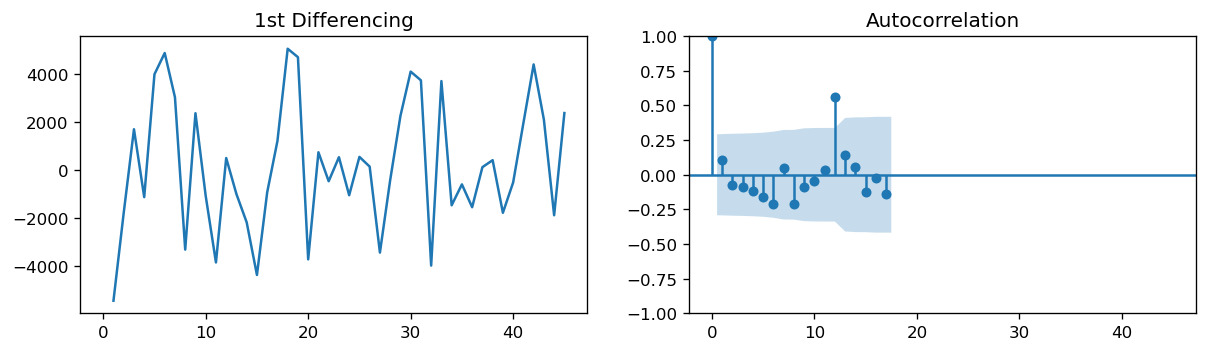

In [47]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Mining.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Mining.diff().dropna(), ax=axes[1])

plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Mining, order=(1,1,2), freq = 'MS' ).fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Mining   No. Observations:                   46
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -417.505
Date:                Tue, 11 Apr 2023   AIC                            843.010
Time:                        19:38:34   BIC                            850.237
Sample:                    05-01-2019   HQIC                           845.704
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.086     11.584      0.000       0.831       1.169
ma.L1         -1.0268      0.249     -4.118      0.000      -1.516      -0.538
ma.L2          0.0275      0.122      0.225      0.8

In [40]:
# 1,1,1 ARIMA Model
model = ARIMA(df.Mining, order=(1,1,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Mining   No. Observations:                   46
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -417.639
Date:                Tue, 11 Apr 2023   AIC                            841.278
Time:                        19:38:40   BIC                            846.698
Sample:                    05-01-2019   HQIC                           843.299
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2040      1.448      0.141      0.888      -2.635       3.043
ma.L1         -0.2297      1.377     -0.167      0.868      -2.929       2.470
sigma2      7.124e+06   2.15e+06      3.318      0.0

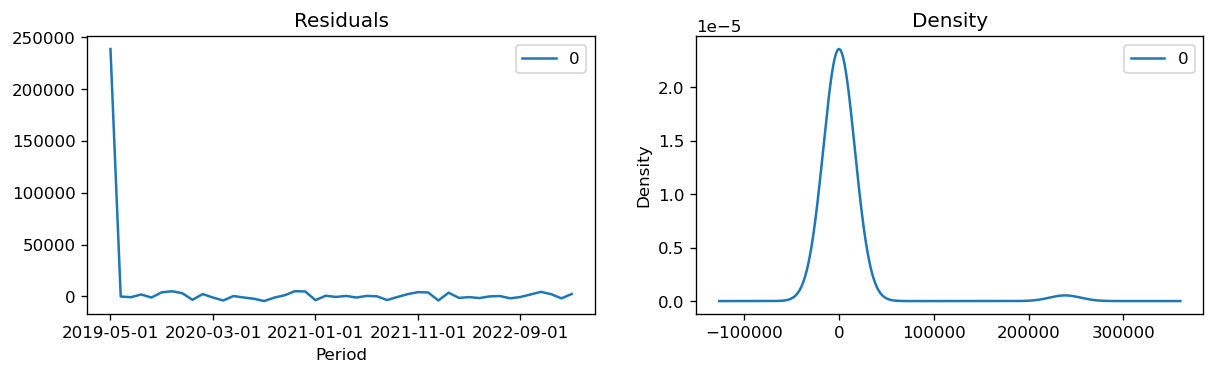

In [41]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [42]:
import datetime
df['Period'] = df['Period'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [43]:

# Create Training and Test
train = df.Mining.values[:25]
test = df.Mining.values[25:]

Plotting ARIMA Model
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -228.828
Date:                Tue, 11 Apr 2023   AIC                            473.657
Time:                        19:39:09   BIC                            483.408
Sample:                             0   HQIC                           476.361
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.367e+05    546.645    432.955      0.000    2.36e+05    2.38e+05
ar.L1          0.7841      0.617      1.271      0.204      -0.425       1.993
ar.L2          0.4173      1.09

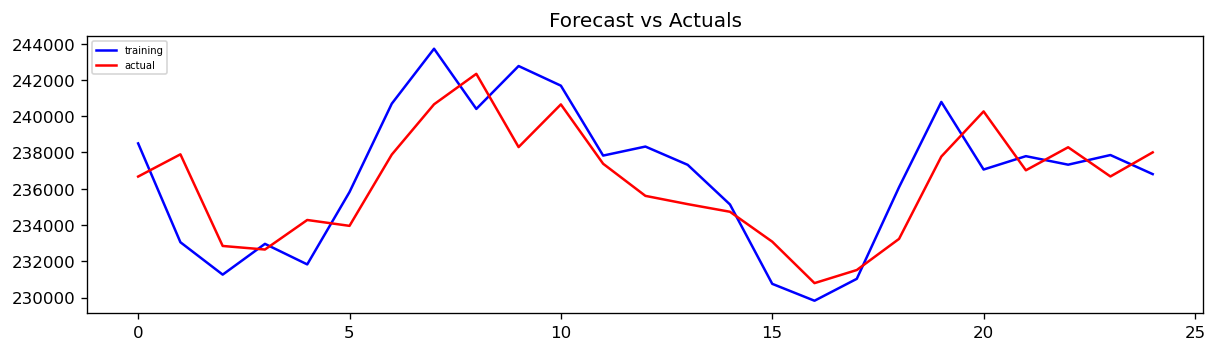

In [44]:
print('Plotting ARIMA Model')
model = ARIMA(train, order=(4,0,2))
results_ARIMA = model.fit()
print(results_ARIMA.summary())
plt.plot(train,label='training',color='b')
plt.plot(results_ARIMA.fittedvalues,label='actual', color='r')
plt.title('Forecast vs Actuals' .format(sum((results_ARIMA.fittedvalues-train)**2)))
plt.legend(loc='upper left', fontsize=6)
plt.show()

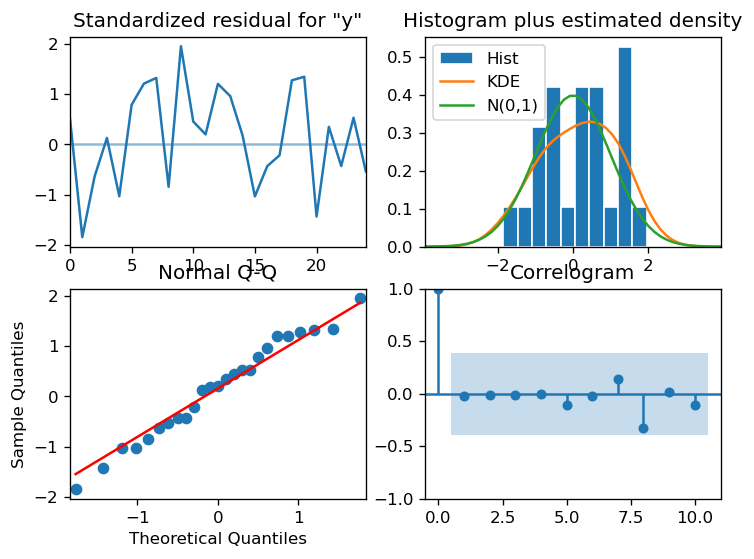

In [45]:

results_ARIMA.plot_diagnostics(figsize=(7,5))
plt.show()

Plotting ARIMA Model


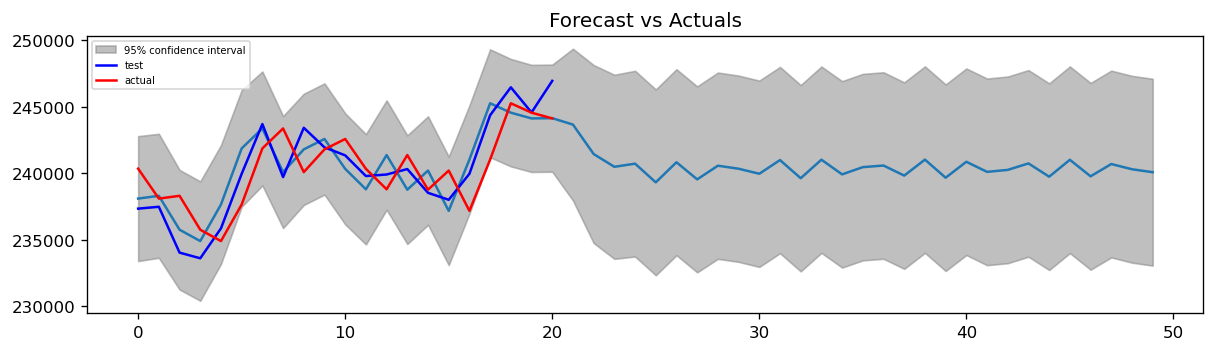

In [46]:
print('Plotting ARIMA Model')
model = ARIMA(test, order=(4,0,2))
results_ARIMA = model.fit()

plot_predict(results_ARIMA,1, 50,label='forecast', color= 'yellow')
plt.plot(test,label='test',color='b')
plt.plot(results_ARIMA.fittedvalues,label='actual', color='r')
plt.title('Forecast vs Actuals'.format(sum((results_ARIMA.fittedvalues-test)**2)))
plt.legend(loc='upper left', fontsize=6)
plt.show()